# CHAPTER 1 (cont)

### Saving and loading a model

In this section, we will save and load a neural network model. Retraining a model every time is impractical. The good news is that we can save a network to disk and load it whenever we need it, whether to improve its performance with more training or to use it to make predictions on fresh data.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

first we need to define a function that will download and prepare the data. It will normalize the train
and test sets and one-hot encoding the labels. And also reshape for our network.

For understanding the code blocks, i will show 'what each step makes' then prepare a function with them

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train shape is :{}'.format(X_train.shape))
print('y_train shape is :{}'.format(y_train.shape))
print('X_test shape is :{}'.format(X_test.shape))
print('y_test shape is :{}'.format(y_test.shape))

X_train shape is :(60000, 28, 28)
y_train shape is :(60000,)
X_test shape is :(10000, 28, 28)
y_test shape is :(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Normalize data.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# Reshape grayscale to include channel dimension.
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

 Because of the input shape of our CNN , we need to add a dimension.

In [8]:
print('X_train shape is :{}'.format(X_train.shape))
print('X_test shape is :{}'.format(X_test.shape))

X_train shape is :(60000, 28, 28, 1)
X_test shape is :(10000, 28, 28, 1)


In [9]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# Process labels (one hot encoding)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [11]:
y_train[:10]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [12]:
print('y_train shape is :{}'.format(y_train.shape))

y_train shape is :(60000, 10)


and our function for loading data would be : 

In [13]:
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalize data.
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape grayscale to include channel dimension.
    X_train = np.expand_dims(X_train, axis=3)
    X_test = np.expand_dims(X_test, axis=3)

    # Process labels.
    label_binarizer = LabelBinarizer()
    y_train = label_binarizer.fit_transform(y_train)
    y_test = label_binarizer.fit_transform(y_test)

    return X_train, y_train, X_test, y_test

We need to define a function for building our CNN. The architecture comprises a single convolutional layer and two fully connected layers. The explanation of layers is not the concept of this section

In [14]:
def build_network():
    input_layer = Input(shape=(28, 28, 1), name='input_layer')
    convolution_1 = Conv2D(kernel_size=(2, 2),
                           padding='same',
                           strides=(2, 2),
                           filters=32,
                           name='convolution_1')(input_layer)
    activation_1 = ReLU(name='activation_1')(convolution_1)
    batch_normalization_1 = BatchNormalization(name='batch_normalization_1')(activation_1)
    pooling_1 = MaxPooling2D(pool_size=(2, 2),
                             strides=(1, 1),
                             padding='same',
                             name='pooling_1')(batch_normalization_1)
    dropout = Dropout(rate=0.5, name='dropout')(pooling_1)

    flatten = Flatten(name='flatten')(dropout)
    dense_1 = Dense(units=128, name='dense_1')(flatten)
    activation_2 = ReLU(name='activation_2')(dense_1)
    dense_2 = Dense(units=10, name='dense_2')(activation_2)
    output = Softmax(name='output')(dense_2)

    network = Model(inputs=input_layer, outputs=output, name='my_model')

    return network

Also we should define a function that will evaluate a network using the test set

In [15]:
def evaluate(model, X_test, y_test):
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy: {accuracy}')

In [16]:
print('Loading and pre-processing data.')
X_train, y_train, X_test, y_test = load_data()

# Split dataset.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

# Build network.
model = build_network()

Loading and pre-processing data.


In [17]:
# Compile and train model.
print('Training network...')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=1024)

Training network...
Epoch 1/40
47/47 [==============================] - 3s 17ms/step - loss: 0.6163 - accuracy: 0.8211 - val_loss: 1.7419 - val_accuracy: 0.8968
Epoch 2/40
47/47 [==============================] - 1s 12ms/step - loss: 0.1805 - accuracy: 0.9433 - val_loss: 1.4851 - val_accuracy: 0.9515
Epoch 3/40
47/47 [==============================] - 1s 12ms/step - loss: 0.1300 - accuracy: 0.9579 - val_loss: 1.2597 - val_accuracy: 0.9567
Epoch 4/40
47/47 [==============================] - 1s 12ms/step - loss: 0.1026 - accuracy: 0.9684 - val_loss: 1.0342 - val_accuracy: 0.9578
Epoch 5/40
47/47 [==============================] - 1s 12ms/step - loss: 0.0874 - accuracy: 0.9721 - val_loss: 0.8070 - val_accuracy: 0.9470
Epoch 6/40
47/47 [==============================] - 1s 12ms/step - loss: 0.0761 - accuracy: 0.9754 - val_loss: 0.5893 - val_accuracy: 0.9560
Epoch 7/40
47/47 [==============================] - 1s 12ms/step - loss: 0.0658 - accuracy: 0.9780 - val_loss: 0.4201 - val_accuracy: 

In [18]:
print('Saving model and weights as HDF5.')
model.save('mnist_model_weights.hdf5')

Saving model and weights as HDF5.


When you check the directory , you can see the model as 'mnist_model_weights.hdf5'... Now we recall model and evaluate it with test dataset

In [19]:
print('Loading model and weights as HDF5.')
loaded_model = load_model('mnist_model_weights.hdf5')

Loading model and weights as HDF5.


In [20]:
print('Evaluating using loaded model.')
evaluate(loaded_model, X_test, y_test)

Evaluating using loaded model.
Accuracy: 0.9846000075340271


### Visualizing a model's architecture

In this section , we willtalk about two different ways we can display a model's architecture:
    
    • Using a text summary
    • Using a visual diagram

In [1]:
from PIL import Image
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

First define input

In [2]:
input_layer = Input(shape=(64, 64, 3), name='input_layer')

1. convolution layer

In [3]:
convolution_1 = Conv2D(kernel_size=(2, 2),
                       padding='same',
                       strides=(2, 2),
                       filters=32,
                       name='convolution_1')(input_layer)
activation_1 = LeakyReLU(name='activation_1')(convolution_1)
batch_normalization_1 = BatchNormalization(name='batch_normalization_1')(activation_1)
pooling_1 = MaxPooling2D(pool_size=(2, 2),
                         strides=(1, 1),
                         padding='same',
                         name='pooling_1')(batch_normalization_1)


2. convolution layer

In [4]:
convolution_2 = Conv2D(kernel_size=(2, 2),
                       padding='same',
                       strides=(2, 2),
                       filters=64,
                       name='convolution_2')(pooling_1)
activation_2 = LeakyReLU(name='activation_2')(convolution_2)
batch_normalization_2 = BatchNormalization(name='batch_normalization_2')(activation_2)
pooling_2 = MaxPooling2D(pool_size=(2, 2),
                         strides=(1, 1),
                         padding='same',
                         name='pooling_2')(batch_normalization_2)

Then Dense Layers

In [5]:
dropout = Dropout(rate=0.5, name='dropout')(pooling_2)

flatten = Flatten(name='flatten')(dropout)
dense_1 = Dense(units=256, name='dense_1')(flatten)
activation_3 = LeakyReLU(name='activation_3')(dense_1)

dense_2 = Dense(units=128, name='dense_2')(activation_3)
activation_4 = LeakyReLU(name='activation_4')(dense_2)

dense_3 = Dense(units=3, name='dense_3')(activation_4)

output = Softmax(name='output')(dense_3)

In [6]:
model = Model(inputs=input_layer, outputs=output, name='visualize_model')

In [7]:
print(model.summary())


Model: "visualize_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64, 64, 3)]       0         
                                                                 
 convolution_1 (Conv2D)      (None, 32, 32, 32)        416       
                                                                 
 activation_1 (LeakyReLU)    (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 pooling_1 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 convolution_2 (Conv2D)      (None, 16, 16, 64)        8256      
                                                   

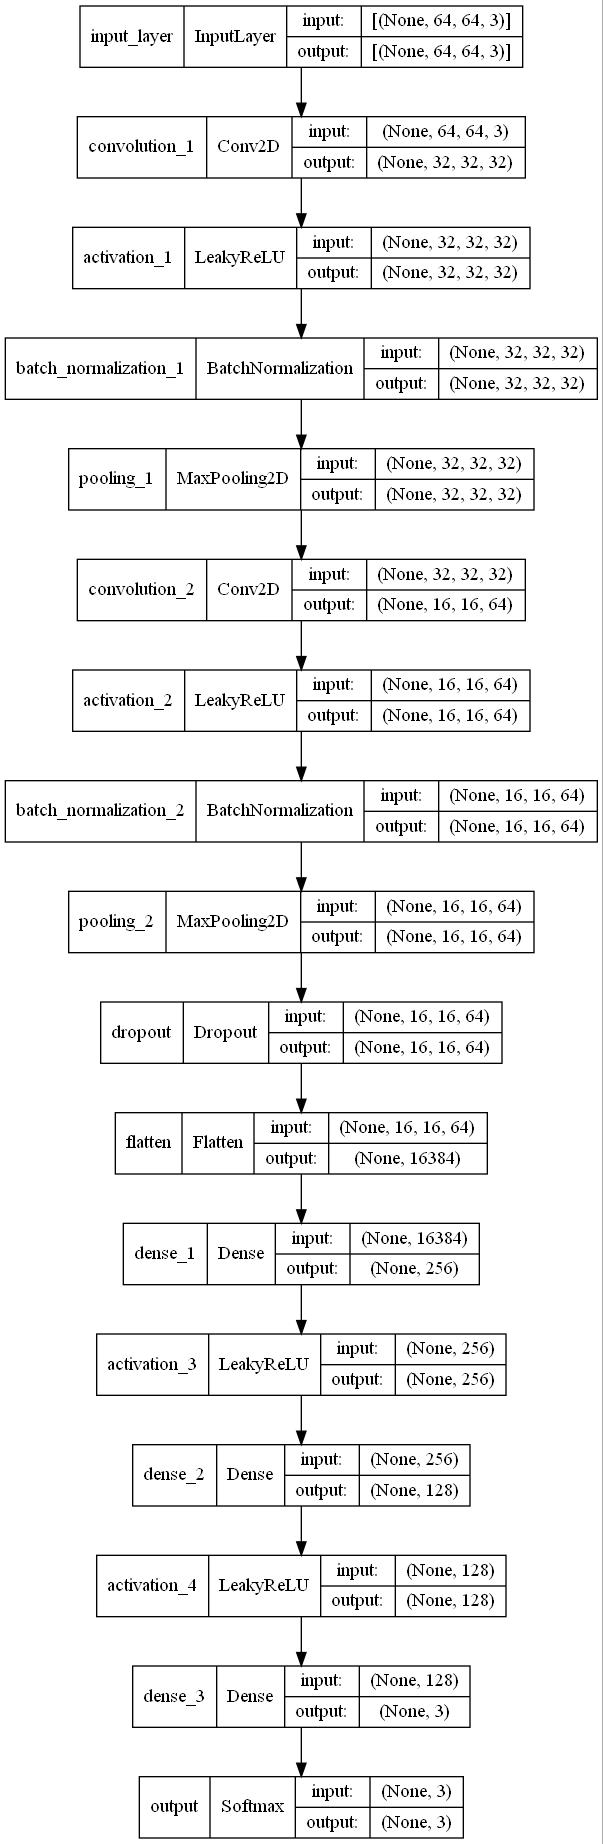

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='my_model_for_visualize.jpg')

### Creating a basic image classifier

In this section, we will implement an image classifier on Fashion-MNIST, very popular alternative to mnist.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.datasets import fashion_mnist as fm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import plot_model

we will load and prepare the dataset as before . 
    
    normalize the data,
    one-hot encode the labels, 
    take a portion of the training set for validation,
    and wrap the three data subsets into three separate tf.data.Dataset instances to increase performance using from_tensor_slices():

In [11]:
def load_dataset():
    (X_train, y_train), (X_test, y_test) = fm.load_data()

    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape grayscale to include channel dimension.
    X_train = np.expand_dims(X_train, axis=3)
    X_test = np.expand_dims(X_test, axis=3)

    label_binarizer = LabelBinarizer()
    y_train = label_binarizer.fit_transform(y_train)
    y_test = label_binarizer.fit_transform(y_test)

    (X_train, X_val,
     y_train, y_val) = train_test_split(X_train, y_train,
                                        train_size=0.8)

    train_ds = (tf.data.Dataset
                .from_tensor_slices((X_train, y_train)))
    val_ds = (tf.data.Dataset
              .from_tensor_slices((X_val, y_val)))
    test_ds = (tf.data.Dataset
               .from_tensor_slices((X_test, y_test)))

    return train_ds, val_ds, test_ds

In [12]:
def build_network():
    input_layer = Input(shape=(28, 28, 1))
    x = Conv2D(filters=20,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(input_layer)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.5)(x)

    x = Conv2D(filters=50,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.5)(x)

    x = Flatten()(x)
    x = Dense(units=500)(x)
    x = ELU()(x)
    x = Dropout(0.5)(x)

    x = Dense(10)(x)
    output = Softmax()(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

this time we define a function that takes a model's training history, along with a metric of interest, to create a plot corresponding to the training and validation of the curves of such a metric

In [28]:
def plot_model_history(model_history, metric, ylim=None):
    plt.style.use('seaborn-darkgrid')
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({'Model': model_history}, metric=metric)

    plt.title(f'{metric.upper()}')
    if ylim is None:
        plt.ylim([0, 1])
    else:
        plt.ylim(ylim)

    plt.savefig(f'{metric}offashionmnist.png')
    plt.close()

In [14]:
BATCH_SIZE = 256
BUFFER_SIZE = 1024

train_dataset, val_dataset, test_dataset = load_dataset()

train_dataset = (train_dataset
                 .shuffle(buffer_size=BUFFER_SIZE)
                 .batch(BATCH_SIZE)
                 .prefetch(buffer_size=BUFFER_SIZE))
val_dataset = (val_dataset
               .batch(BATCH_SIZE)
               .prefetch(buffer_size=BUFFER_SIZE))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [15]:
train_dataset

<PrefetchDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.int32)>

In [16]:
val_dataset

<PrefetchDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.int32)>

In [20]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

188
47
40


In [24]:
EPOCHS = 50

model = build_network()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model_history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)

Epoch 1/50
188/188 [==============================] - 6s 13ms/step - loss: 1.0249 - accuracy: 0.7090 - val_loss: 2.7349 - val_accuracy: 0.4821
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 0.5691 - accuracy: 0.8020 - val_loss: 1.1500 - val_accuracy: 0.6889
Epoch 3/50
188/188 [==============================] - 2s 12ms/step - loss: 0.4734 - accuracy: 0.8307 - val_loss: 0.4185 - val_accuracy: 0.8618
Epoch 4/50
188/188 [==============================] - 2s 12ms/step - loss: 0.4149 - accuracy: 0.8492 - val_loss: 0.3330 - val_accuracy: 0.8873
Epoch 5/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3869 - accuracy: 0.8603 - val_loss: 0.3928 - val_accuracy: 0.8637
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3603 - accuracy: 0.8673 - val_loss: 0.3126 - val_accuracy: 0.8882
Epoch 7/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3458 - accuracy: 0.8734 - val_loss: 0.3036 - val_accuracy: 0.8901

In [29]:
plot_model_history(model_history, 'loss', [0., 2.0])


In [30]:
plot_model_history(model_history, 'accuracy')

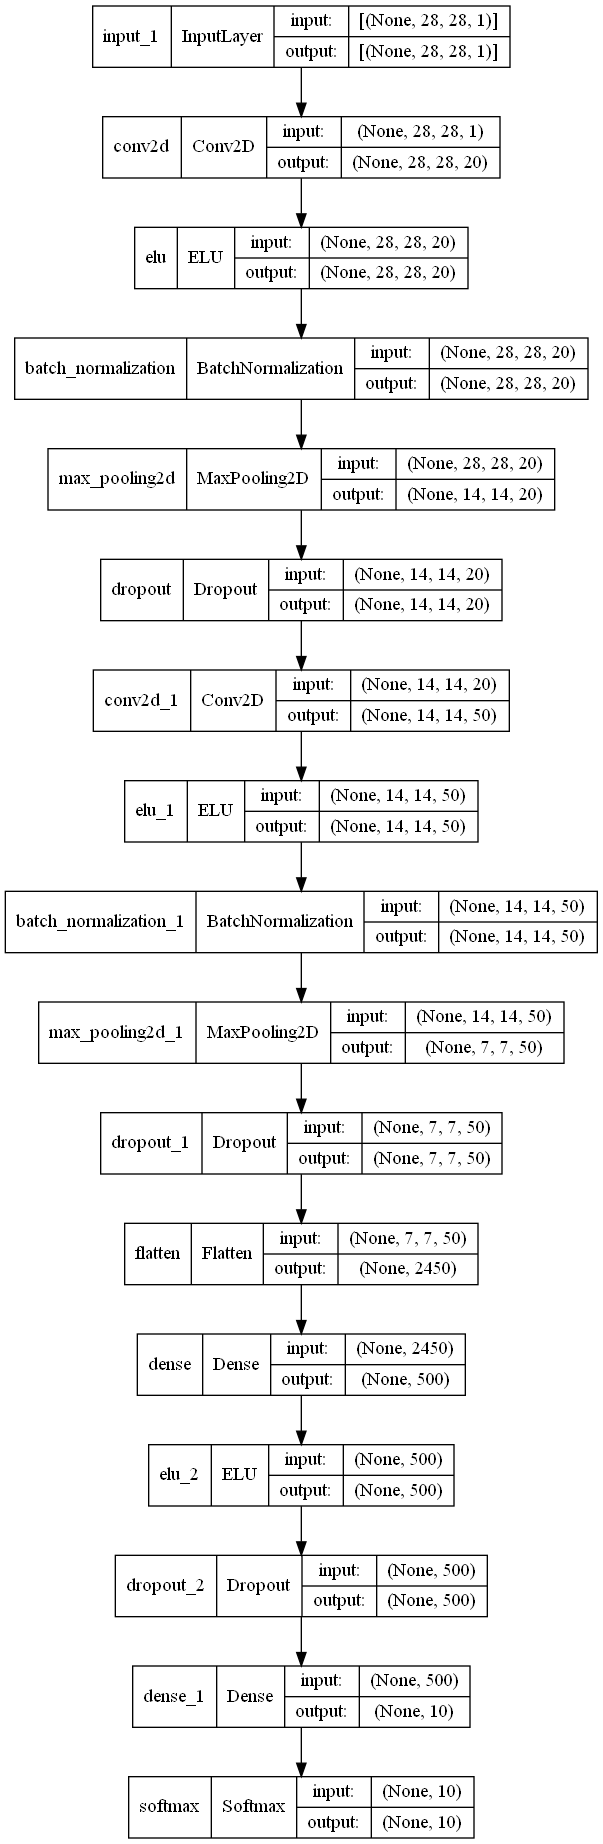

In [31]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='fashion_mnist_model.png')

In [32]:
model.save('fashion_MNIST_model.hdf5')


Now we can load and evaluate our model with test dataset

In [33]:

loaded_model = load_model('fashion_MNIST_model.hdf5')
results = loaded_model.evaluate(test_dataset)
print(f'Loss: {results[0]}, Accuracy: {results[1]}')

40/40 [==============================] - 1s 17ms/step - loss: 0.2685 - accuracy: 0.9158
Loss: 0.26853930950164795, Accuracy: 0.9157999753952026
